#**Introduction**

* Electric vehicles (EVs) represent a significant shift in the automotive industry, driven by the need for sustainable transportation solutions.
* Market Size Analysis is the process of estimating the potential sales for a product or service within a particular market segment.
* In the context of electric vehicles (EVs), it involves assessing the total volume of EV registrations to understand the growth of the market, forecast future trends, and help stakeholders make informed decisions regarding production, infrastructure development, and policy-making
* This project aims to analyze the EV market's size, exploring various factors that influence its growth and potential







#**Aim of the Project**
The main goal of this study is to use past data on electric vehicle (EV) registrations to figure out how common EVs are now, predict how much they will grow in the market, and spot the main trends and driving forces behind this growth. The specific objectives are to:

* Look at the past increase in EV registrations.
* Predict the number of future EV registrations using past patterns.
* Examine how EV registrations vary by model, brand, and location.
* Calculate the expected size and expansion potential of the EV market in the coming years.
* Offer valuable insights to help those involved in making decisions about manufacturing, planning for EV charging infrastructure, and creating policies.





#**Methodology**

* Data Collection
* Data Preprocessing
* Exploratory Data Analysis (EDA)
* Visualization.



In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path ="/content/drive/MyDrive/Machine Learning projects/ev 5/Electric_Vehicle_Population_Data.csv"
ev_df = pd.read_csv(path)

In [4]:
ev_df.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


#***DATA CLEANING***

In [5]:
ev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

##OBSERVATION

In [6]:
# checking missing values
ev_df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [7]:
ev_df = ev_df.dropna()

In [8]:

ev_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177473 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177473 non-null  object 
 1   County                                             177473 non-null  object 
 2   City                                               177473 non-null  object 
 3   State                                              177473 non-null  object 
 4   Postal Code                                        177473 non-null  float64
 5   Model Year                                         177473 non-null  int64  
 6   Make                                               177473 non-null  object 
 7   Model                                              177473 non-null  object 
 8   Electric Vehicle Type                              177473 non-null  object 
 9 

#***Let's explore some areas for EV market analysis:***

1. EV Adoption Over Time: Analyze the growth of the EV population by model year.
2. Geographical Distribution: Understand where EVs are most commonly registered (e.g., by county or city).
3. EV Types: Breakdown of the dataset by electric vehicle type (BEV, etc.).
4. Make and Model Popularity: Identify the most popular makes and models among the registered EVs.
5. Electric Range Analysis: Analyze the electric range of vehicles to see how EV technology is progressing.
6. Estimated Growth in Market Size: Analyze and find the estimated growth in the market size of electric vehicles.

#1. EV ADOPTION OVER TIME:

In [9]:
ev_df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

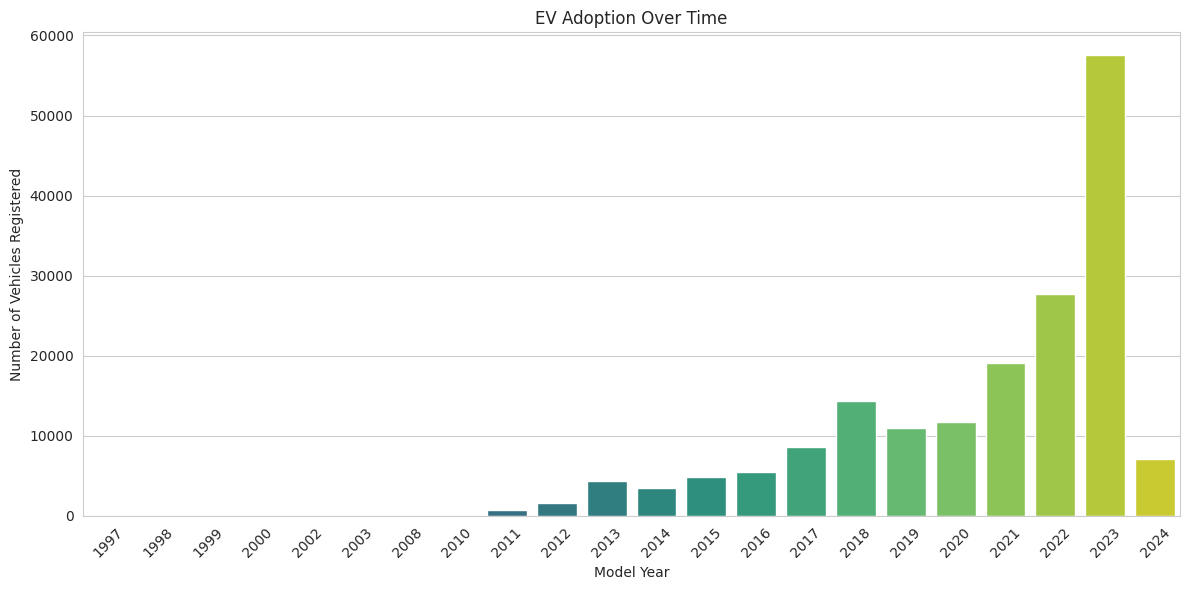

In [10]:
# visualizing ev adoption over time
plt.figure(figsize = (12,6))
ev_adoption_by_year = ev_df['Model Year'].value_counts().sort_index()
sns.barplot(x = ev_adoption_by_year.index, y = ev_adoption_by_year.values, palette = 'viridis')
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()


#***GEOGRAPHICAL DISTRIBUTION***

In [11]:

ev_df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [12]:
# geographical distribution based on county level.
ev_county = ev_df['County'].value_counts()

In [13]:
top_counties = ev_county.head(5).index
top_counties

Index(['King', 'Snohomish', 'Pierce', 'Clark', 'Thurston'], dtype='object', name='County')

In [14]:
# filtering the dataset for these top counties
top_counties_data = ev_df[ev_df['County'].isin(top_counties)]
top_counties_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
5,3FA6P0SU8H,Thurston,Yelm,WA,98597.0,2017,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,2.0,122057736,POINT (-122.61023 46.94126),PUGET SOUND ENERGY INC,5.306701e+10


In [39]:
ev_city_distribution_top_counties = top_counties_data.groupby(['County','City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')
ev_city_distribution_top_counties

,County,City,Number of Vehicles
0,King,Seattle,29447
1,King,Bellevue,8930
2,King,Redmond,6478
3,Clark,Vancouver,6193
4,King,Kirkland,5362
...,...,...,...
128,Thurston,Oakville,1
129,Snohomish,Shoreline,1
130,Pierce,Kapowsin,1
131,King,Gold Bar,1


In [16]:
top_cities = ev_city_distribution_top_counties.head(10)


In [17]:
top_cities

,County,City,Number of Vehicles
0,King,Seattle,29447
1,King,Bellevue,8930
2,King,Redmond,6478
3,Clark,Vancouver,6193
4,King,Kirkland,5362
5,King,Sammamish,5280
6,King,Renton,4980
7,Snohomish,Bothell,4663
8,Thurston,Olympia,4299
9,Pierce,Tacoma,3722


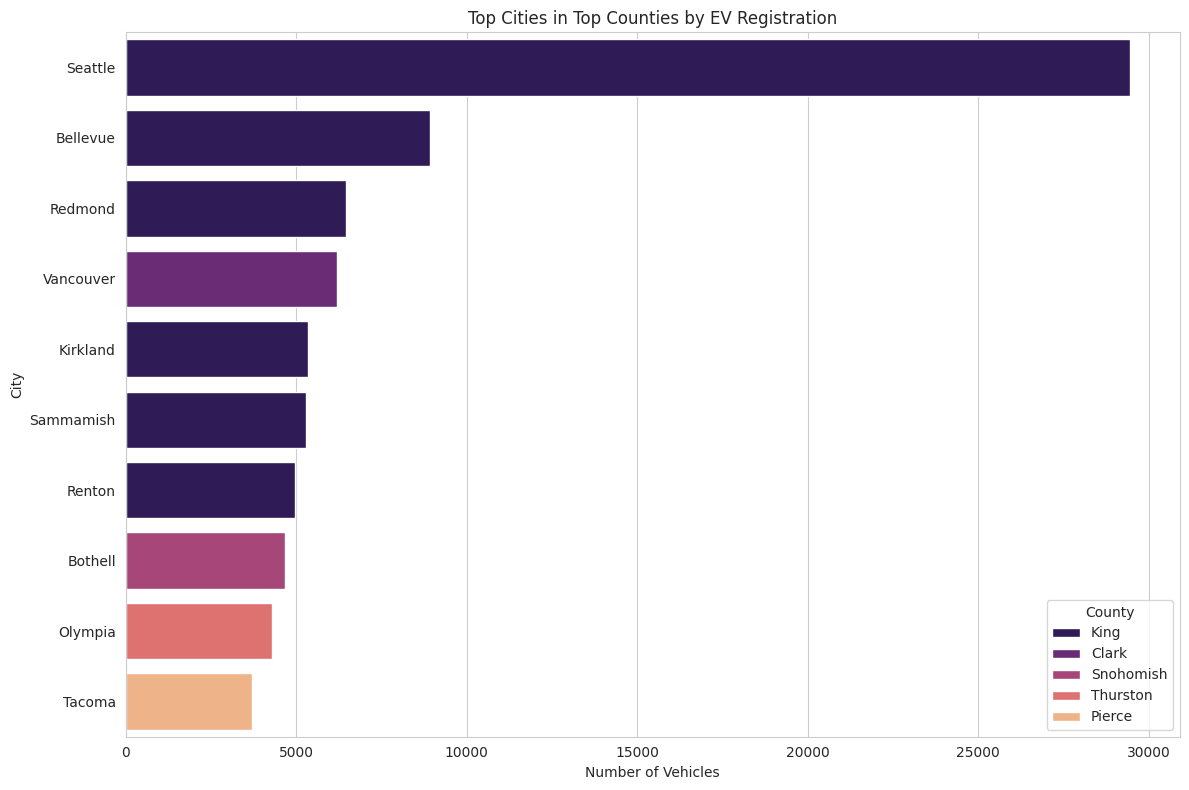

In [18]:
plt.figure(figsize=(12,8))
sns.barplot(x='Number of Vehicles',y='City', hue='County',data= top_cities, palette="magma")
plt.title('Top Cities in Top Counties by EV Registration')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

#Observation:



1) The above graph tells the number of EV's registered in various cities within three counties: King, Snohomish, and Pierce.



 2) Seattle, which is in King County, has the highest number of EV registrations.

3) Overall, the graph indicates that EV adoption is not uniform across the cities and is more concentrated in King County.

# ***3. EV TYPES***

In [19]:
ev_df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [20]:
# analyzing the distribution of electric vehicle Types
ev_type_distribution = ev_df['Electric Vehicle Type'].value_counts()

In [21]:
ev_type_distribution

Electric Vehicle Type
Battery Electric Vehicle (BEV)            138947
Plug-in Hybrid Electric Vehicle (PHEV)     38526
Name: count, dtype: int64

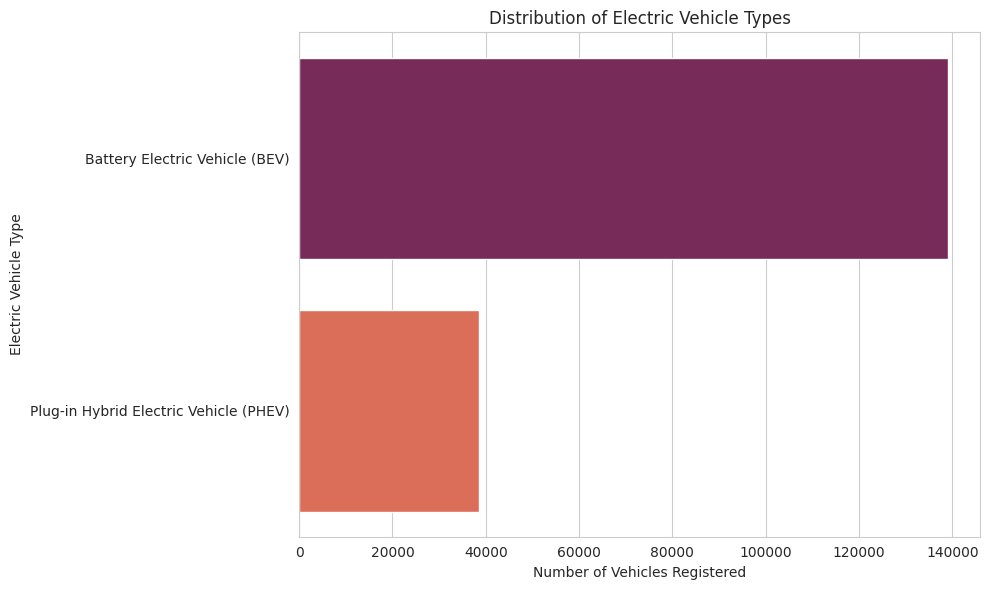

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket")
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

#Observation:

The above graph shows that BEVs are more popular or preferred over PHEVs among the electric vehicles registered in the United States.

#***4. MAKE AND MODEL POPULARITY***

In [23]:
ev_df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [24]:
# analyzing the popularity of EV manufacturers
ev_make_distribution = ev_df['Make'].value_counts().head(10)

In [25]:
ev_make_distribution.head()

Make
TESLA        79471
NISSAN       13984
CHEVROLET    13651
FORD          9177
BMW           7556
Name: count, dtype: int64

In [26]:
ev_make_distribution

Make
TESLA         79471
NISSAN        13984
CHEVROLET     13651
FORD           9177
BMW            7556
KIA            7423
TOYOTA         6254
VOLKSWAGEN     4993
JEEP           4468
HYUNDAI        4398
Name: count, dtype: int64

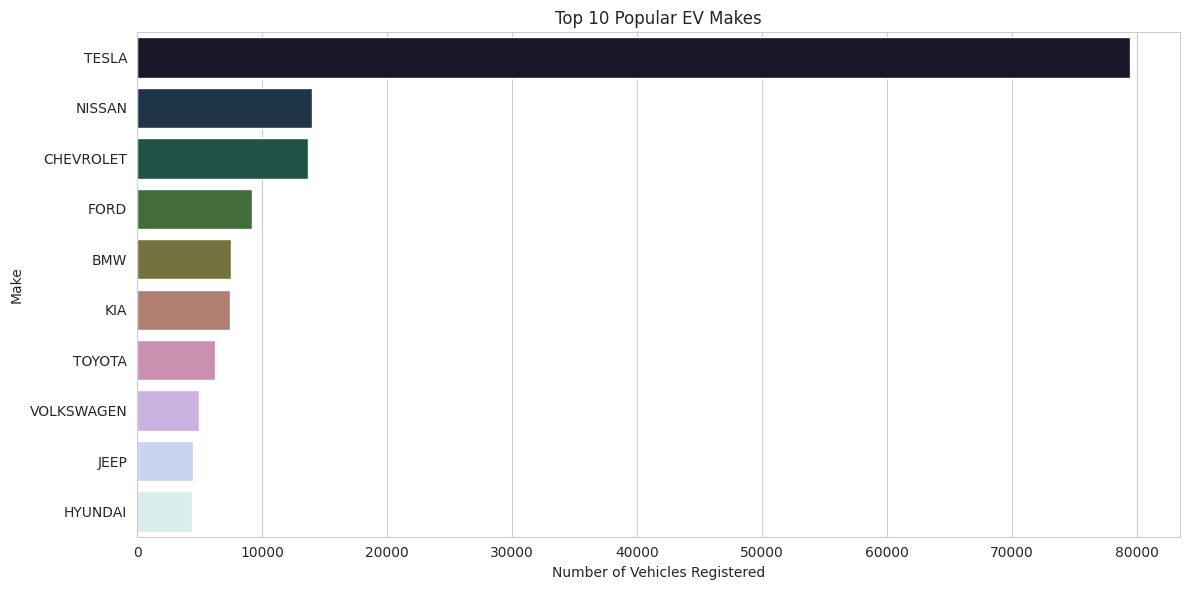

In [27]:
plt.figure(figsize=(12,6))
sns.barplot(x=ev_make_distribution.values, y= ev_make_distribution.index, palette="cubehelix")
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

#Obsevation:

1). Tesla tops the list.


2). NISSAN is the second most popular manufacturer, followed by CHEVROLET, though both have significantly fewer registrations than TESLA.

# **Let’s see the most popular models within these top manufacturers**

In [28]:
# selecting the top 3 manufacturers based on the number of vehicles registered
top_3_makes = ev_make_distribution.head(3).index

# filtering the dataset for these top manufacturers
top_makes_data = ev_df[ev_df['Make'].isin(top_3_makes)]

# analyzing the popularity of EV models within these top manufacturers
ev_model_distribution_top_makes =top_makes_data.groupby(['Make','Model']).size().sort_values(ascending=False).reset_index(name = 'Number of vehicles')

# visualizing the top 10 models across these manufacturers for clarity
top_models = ev_model_distribution_top_makes.head(10)

In [29]:
top_models

,Make,Model,Number of vehicles
0,TESLA,MODEL Y,35921
1,TESLA,MODEL 3,30009
2,NISSAN,LEAF,13352
3,TESLA,MODEL S,7711
4,CHEVROLET,BOLT EV,6811
5,TESLA,MODEL X,5784
6,CHEVROLET,VOLT,4782
7,CHEVROLET,BOLT EUV,1770
8,NISSAN,ARIYA,632
9,CHEVROLET,SPARK,240


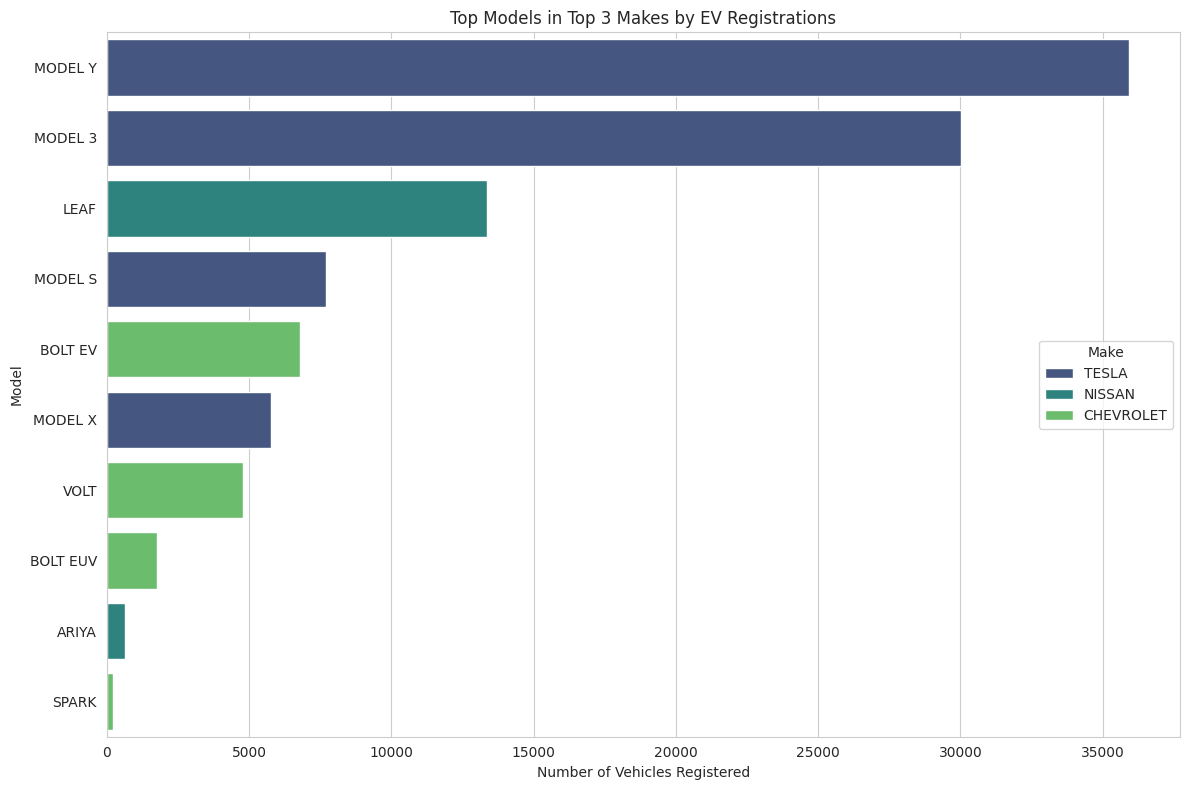

In [30]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Number of vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

#Observation:

1). Tesla's Model Y and Model 3 are the most registered vehicles.

#***5. ELECTRIC RANGE ANALYSIS***

In [31]:
ev_df.columns


Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

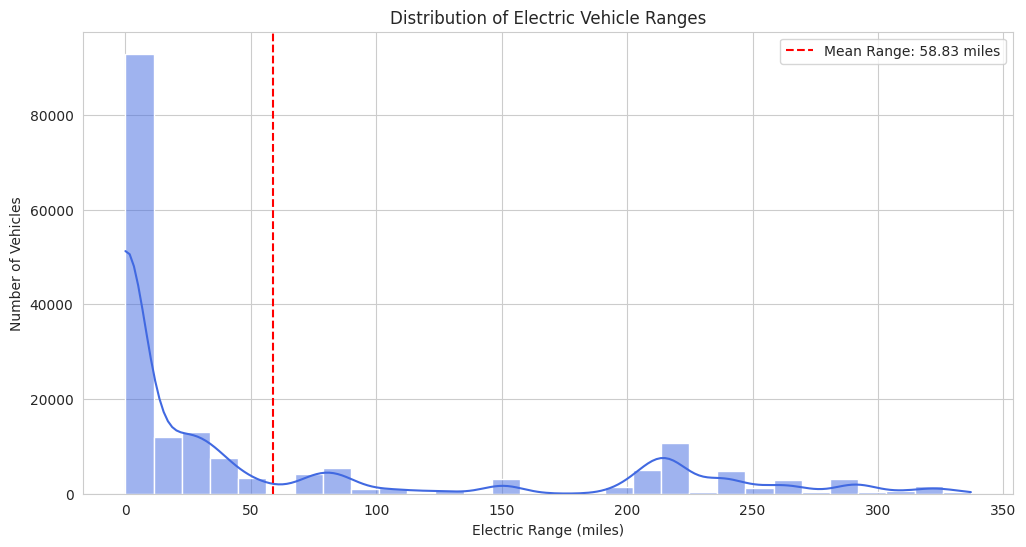

In [32]:
# analyzing the distribution of electric range
plt.figure(figsize=(12,6))
sns.histplot(ev_df['Electric Range'], bins=30,kde=True,color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_df['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {ev_df["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

#Observation:

1).There is a high frequency of vehicles with a low electric range, with a significant peak occurring just before 50 miles.




2).The distribution is skewed to the right, with a long tail extending towards
higher ranges, although the number of vehicles with higher ranges is much less frequent.

3).Despite the presence of electric vehicles with ranges that extend up to around 350 miles, the majority of the vehicles have a range below the mean.

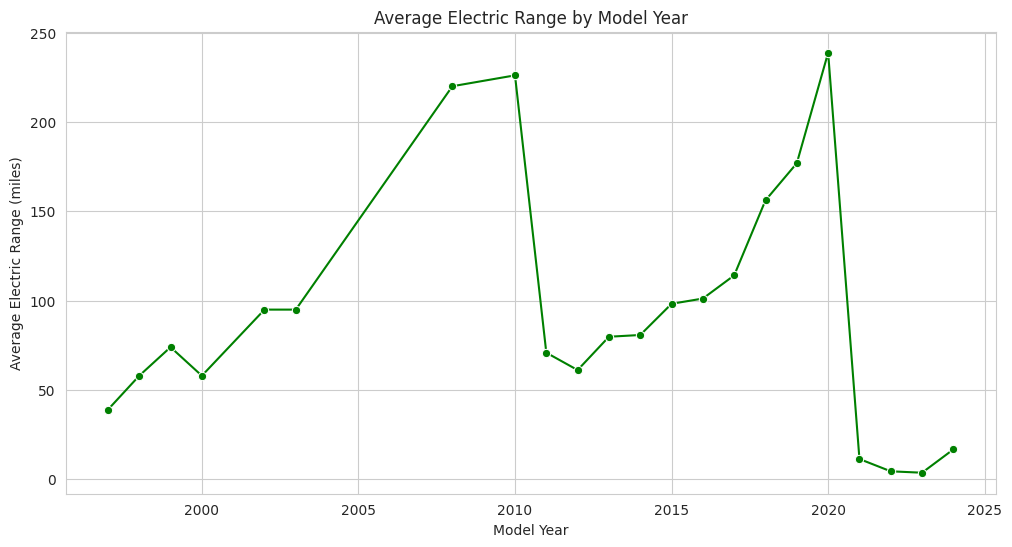

In [33]:
# calculating the average electric range by model year
average_range_by_year = ev_df.groupby('Model Year') ['Electric Range'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

#Observation:
1).There is an upward trend in the average electric range of EVs over the years, indicating improvements in technology and battery efficiency.

2).There is a noticable peak around the year 2020.

3).After 2020 significant drop in the average range, which could indicate that data for the following years might be incomplete or reflect the introduction of several lower-range models.

##Lets explore how electric ranges very among the top manufacturers and model

In [34]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()
# the top 10 models with the highest average electric range
top_range_models = average_range_by_model.head(10)
top_range_models

,Make,Model,Electric Range
0,TESLA,ROADSTER,234.673913
1,TESLA,MODEL S,176.794449
2,CHEVROLET,BOLT EV,154.857143
3,TESLA,MODEL X,137.192600
4,TESLA,MODEL 3,109.463028
5,NISSAN,LEAF,84.148742
6,CHEVROLET,SPARK,82.000000
7,CHEVROLET,VOLT,45.365119
8,CHEVROLET,S-10 PICKUP,39.000000
9,TESLA,MODEL Y,19.191531


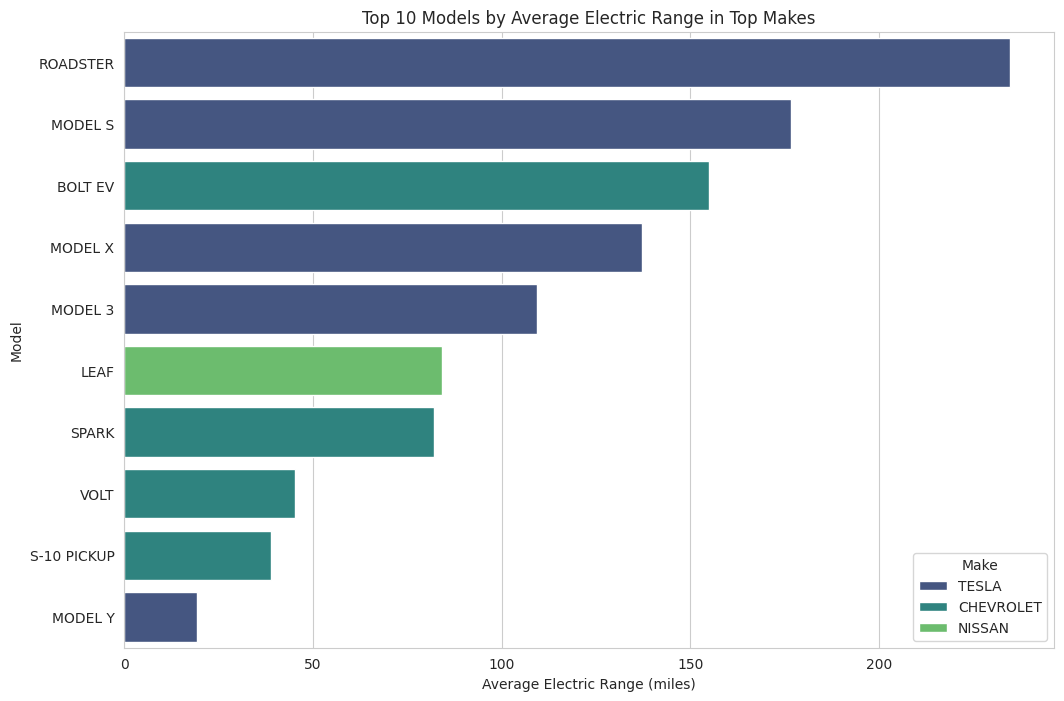

In [35]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="viridis")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.show()

## Observatiob:

The TESLA ROADSTER has the highest average electric range among the models listed.

#***6).Estimated Growth in Market Size***



In [36]:
# calculate the number of EVs registered each year
ev_registration_counts = ev_df['Model Year'].value_counts().sort_index()
ev_registration_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64



1.   In 2021, there were 12126 EVs registered.
2.   In 2022, the number increased to 17655 EVs.
3.   In 2023, a significant jump to 36779 EVs was observed.
4.   For 2024, currently, 4581 EVs are registered, which suggests partial data.









In [37]:
from scipy.optimize import curve_fit
import numpy as np
# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 79079.2066611501, 2025: 119653.95934090775, 2026: 181047.21317328632, 2027: 273940.7335817853, 2028: 414496.9933533305, 2029: 627171.2689549965}



#**Now, let’s plot the estimated market size data:**

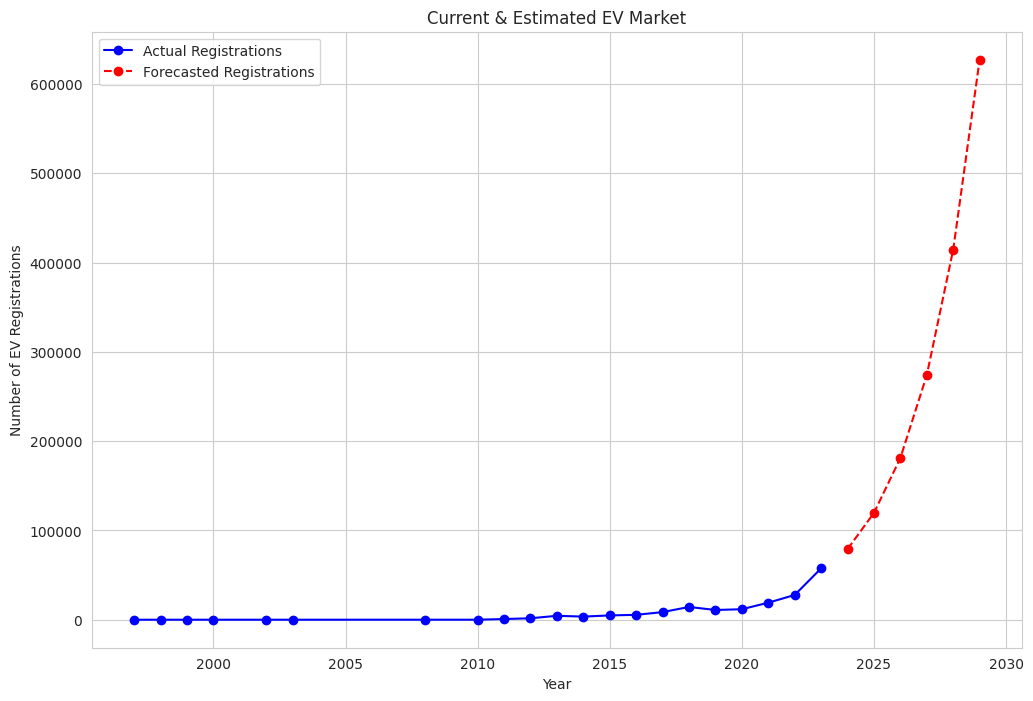

In [38]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()

#**Conclusion:**



1. The forecasted EV registrations predict an even more dramatic increase in the near future, with the number of registrations expected to rise sharply in the coming years.
2. we can conclude that the EV market size is expected to expand considerably.

